# Práctica 2. Funciones básicas de OpenCV

Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## TAREA 1

In [2]:
# Read image from file
img = cv2.imread('mandril.jpg') 

# Convert image to grayscale
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
canny = cv2.Canny(gris, 250, 100)

### Tarea 1.1 

Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). 

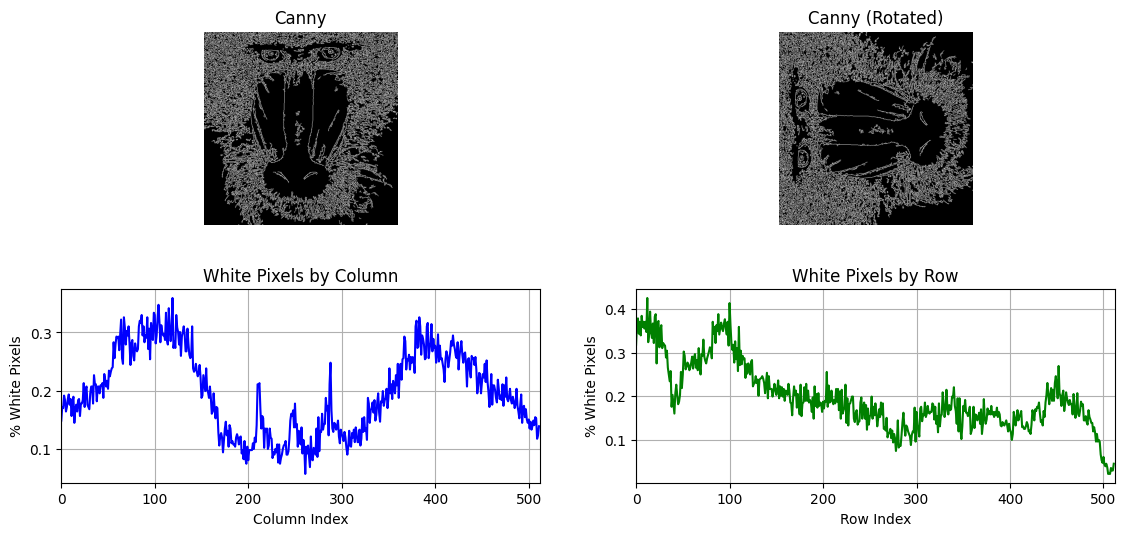

In [5]:
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = np.transpose(cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)) 

# Normalize by the number of rows and the maximum pixel value (255)
col_percentages = col_counts[0] / (255 * canny.shape[0]) # % of white pixels per column
row_percentages = row_counts[0] / (255 * canny.shape[1]) # % of white pixels per row

# Plot the results
plt.figure(figsize=(12, 6))

# Original Canny image
plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

# Rotated Canny image for better visualization
plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Canny (Rotated)")
plt.imshow(np.rot90(canny), cmap='gray')

# Column-wise white pixel percentage
plt.subplot(2, 2, 3)
plt.title("White Pixels by Column")
plt.xlabel("Column Index")
plt.ylabel("% White Pixels")
plt.plot(col_percentages, color='blue')
plt.grid(True)

# Row-wise white pixel percentage
plt.subplot(2, 2, 4)
plt.title("White Pixels by Row")
plt.xlabel("Row Index")
plt.ylabel("% White Pixels")
plt.plot(row_percentages, color='green')
plt.grid(True)

# Set x-axis range for both plots
plt.subplot(2, 2, 3).set_xlim([0, canny.shape[1]])
plt.subplot(2, 2, 4).set_xlim([0, canny.shape[0]])

plt.tight_layout(pad=3.0)
plt.show()

Determina el valor máximo de píxeles blancos para filas, `maxfil`, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

Maximum white pixels in a row: 218
Number of rows with white pixels >= 0.95 * maxfil: 2
Positions of these rows: [ 12 100]
Maximum white pixels in a column: 184
Number of columns with white pixels >= 0.95 * maxcol: 3
Positions of these columns: [104 115 119]


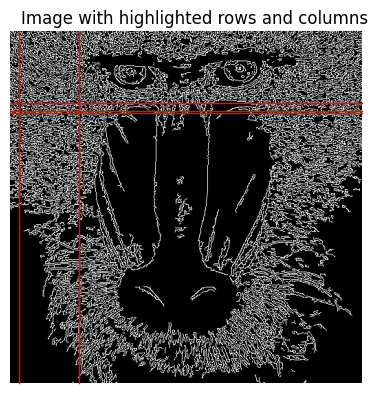

In [8]:
img = cv2.imread('mandril.jpg') 
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(grayscale, 250, 100)

# Calculate the number of white pixels
row_counts = np.sum(canny == 255, axis=1)
col_counts = np.sum(canny == 255, axis=0)

# Determine the maximum number of white pixels in any row
maxfil = np.max(row_counts)
maxcol = np.max(col_counts)

# Find rows with white pixel count greater than or equal to 0.95 * maxfil
threshold_x = 0.95 * maxfil
rows_above_threshold = np.where(row_counts >= threshold_x)[0]

# Find columns with white pixel count greater than or equal to 0.95 * maxcol
threshold_y = 0.95 * maxcol
cols_above_threshold = np.where(col_counts >= threshold_y)[0]

# Print the results
print(f"Maximum white pixels in a row: {maxfil}")
print(f"Number of rows with white pixels >= 0.95 * maxfil: {len(rows_above_threshold)}")
print(f"Positions of these rows: {rows_above_threshold}")

print(f"Maximum white pixels in a column: {maxcol}")
print(f"Number of columns with white pixels >= 0.95 * maxcol: {len(cols_above_threshold)}")
print(f"Positions of these columns: {cols_above_threshold}")

# Plot the image with the highlighted rows and columns
plt.figure()
plt.axis("off")
plt.title("Image with highlighted rows and columns")
plt.imshow(canny, cmap='gray')

for i in rows_above_threshold:
    plt.plot([i, i], [0, canny.shape[1]], 'r', linewidth=1)

for i in cols_above_threshold: 
    plt.plot([0, canny.shape[0]], [i, i], 'r', linewidth=1)

## TAREA 2 

Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

## TAREA 3 

Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura. Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


## TAREA 4

Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.